### 【問題1】線形回帰のクラスを作成する
線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。
以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [1]:
# import module
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
'''
Kaggle House Prices: "Advanced Regression Techniques"のデータを取り込み、重回帰分析のスクラッチを行う。

目的変数：'SalePrice' / '家の査定金額'
説明変数：'GrLivArea', 'YearBuilt' / 'リビングの大きさ'、'築年'

課題の目的：スクッチとクラスの構造に慣れる。

'''

# import file
df_train = pd.read_csv("train.csv")

house_X = df_train.loc[:, ['GrLivArea', 'YearBuilt']].values

house_y = df_train['SalePrice'].values
# house_y = house_y.rename(columns={0:'SalesPrice'})

 # split train data and test data
X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)

# house_X.to_csv("linear_X.csv" )
# house_y.to_csv("linear_y.csv")

In [3]:
# # split train data and test data
# X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)

# data_len = len(X_train) 

# mu = X_train.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X_train.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

# # 標準化処理
# X_norm = (X_train -mu)/sigma

# data_len = len(X)
        
# mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）
 
                
# # 3. パラメータをランダム値で初期化
# theta = np.random.rand(X.shape[1])

# # Xの０列目に「１」のベクトルを追加
# X_one =  np.hstack((np.ones((data_len, 1)), X_norm))
# print(X_one.shape)
# print(y_train.shape)
# print(theta.shape)
# error = 0.5*np.sum((y_train-(np.dot(X_one, theta)))**2)

# count = 0

# for _ in range(10):
#     theta_temp = theta - 0.001*np.dot(((np.dot(X, theta))-y_train), X)
#     theta = theta_temp

#     current_error = np.sum(((np.dot(X, theta)) - y_train) ** 2)
#     diff = error - current_error
#     error = current_error

#     count += 1
#     log = "{}回目、誤差：{}"
#     print(log.format(count, diff))



In [4]:
# fit
# # split train data and test data
# X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)


# m = len(X_train)
# n = X_train.shape[1]

# mu = X_train.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X_train.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

# # 標準化処理
# X_train = (X_train -mu)/sigma

# # Xの０列目に「１」のベクトルを追加

# X_train = np.hstack((np.ones(m).reshape(m, 1),X_train))
# theta = np.random.rand(X_train.shape[1], 1)

# alpha = 0.1
# y_train = y_train.reshape(m, 1)
# hx = np.dot(X_train, theta)
# count = 0
# error = 0.5*np.sum(((np.dot(X_train, theta)-y_train))**2)

# for i in range(200):
#     theta = theta - alpha *  (1/m) * (np.dot(X_train.T, (hx-y_train)))
#     hx = np.dot(X_train, theta)
#     current_error = 0.5*np.sum(((np.dot(X_train, theta)) - y_train) ** 2)
#     diff = error - current_error
#     error = current_error
#     count += 1
#     log = "{}回目、誤差：{}"

#     print(log.format(count, diff))

    
# # predict

# print(hx)

# #     # trainデータのlossのリザルトを出す
# #     if self.verbose:
# #         self.loss[i] = self.MSE(hx, y)

# #     # X_val入力ある場合MSEのリザルトを出す
# #     if type(X_val) == np.ndarray:
# #         val_pred = self._linear_hypothesis(X_val)
# #         self.val_loss[i] = self.MSE(val_pred, y_val)

In [5]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        if type(X_val)==np.ndarray:
            self._gradient_descent(X_val, y_val)
            self.val_loss = self.loss
        
        # シータの初期化
        self._init_theta()
        
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)

#             # X_val入力ある場合MSEのリザルトを出す
#             if type(X_val) == np.ndarray:
#                 val_pred = self._linear_hypothesis(X_val)
#                 self.val_loss[i] = self._compute_cost(val_pred, y_val)
                
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J

In [6]:
slr= ScratchLinearRegression()

slr.fit(X_train, y_train, X_test, y_test)

COUNT:1, MSE:19307129312.75864
COUNT:2, MSE:18931946299.138752
COUNT:3, MSE:18564558653.461132
COUNT:4, MSE:18204802672.909336
COUNT:5, MSE:17852518134.511436
COUNT:6, MSE:17507548220.15193
COUNT:7, MSE:17169739443.223993
COUNT:8, MSE:16838941576.885483
COUNT:9, MSE:16515007583.883263
COUNT:10, MSE:16197793547.910793
COUNT:11, MSE:15887158606.465168
COUNT:12, MSE:15582964885.170107
COUNT:13, MSE:15285077433.532566
COUNT:14, MSE:14993364162.101076
COUNT:15, MSE:14707695780.994734
COUNT:16, MSE:14427945739.772524
COUNT:17, MSE:14153990168.613268
COUNT:18, MSE:13885707820.77712
COUNT:19, MSE:13622980016.320349
COUNT:20, MSE:13365690587.03558
COUNT:21, MSE:13113725822.590445
COUNT:22, MSE:12866974417.838144
COUNT:23, MSE:12625327421.273998
COUNT:24, MSE:12388678184.612656
COUNT:25, MSE:12156922313.461306
COUNT:26, MSE:11929957619.064528
COUNT:27, MSE:11707684071.097326
COUNT:28, MSE:11490003751.483055
COUNT:29, MSE:11276820809.213762
COUNT:30, MSE:11068041416.150766
COUNT:31, MSE:108635737

COUNT:156, MSE:1851971358.257091
COUNT:157, MSE:1836560429.7123778
COUNT:158, MSE:1821459574.5310607
COUNT:159, MSE:1806662542.3424094
COUNT:160, MSE:1792163209.028829
COUNT:161, MSE:1777955574.1697824
COUNT:162, MSE:1764033758.5375986
COUNT:163, MSE:1750392001.6441035
COUNT:164, MSE:1737024659.337046
COUNT:165, MSE:1723926201.4452932
COUNT:166, MSE:1711091209.4718206
COUNT:167, MSE:1698514374.333504
COUNT:168, MSE:1686190494.1467786
COUNT:169, MSE:1674114472.0582228
COUNT:170, MSE:1662281314.1191542
COUNT:171, MSE:1650686127.203343
COUNT:172, MSE:1639324116.966964
COUNT:173, MSE:1628190585.8499339
COUNT:174, MSE:1617280931.1177816
COUNT:175, MSE:1606590642.9432418
COUNT:176, MSE:1596115302.526742
COUNT:177, MSE:1585850580.2550209
COUNT:178, MSE:1575792233.8970788
COUNT:179, MSE:1565936106.8367069
COUNT:180, MSE:1556278126.3408637
COUNT:181, MSE:1546814301.8631494
COUNT:182, MSE:1537540723.3816848
COUNT:183, MSE:1528453559.7706802
COUNT:184, MSE:1519549057.2050188
COUNT:185, MSE:151082

In [7]:
hx = slr.predict(X_test)

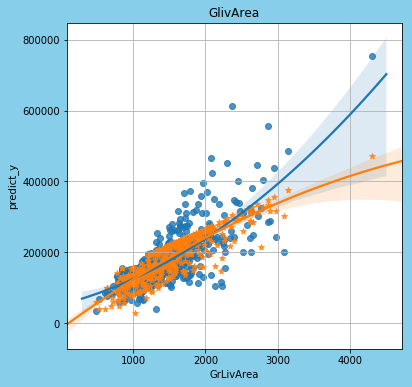

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

'''
predict data　と　test dataの散布図を各説明変数ごとに二次元にプロットする。

'''

predict_y = pd.DataFrame(hx)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

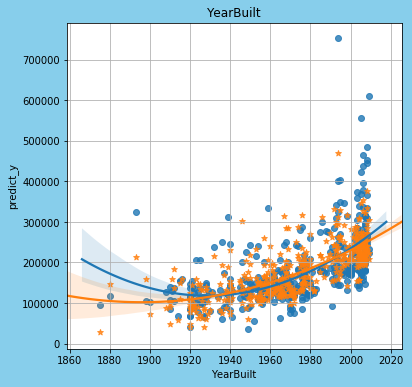

In [9]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

### 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

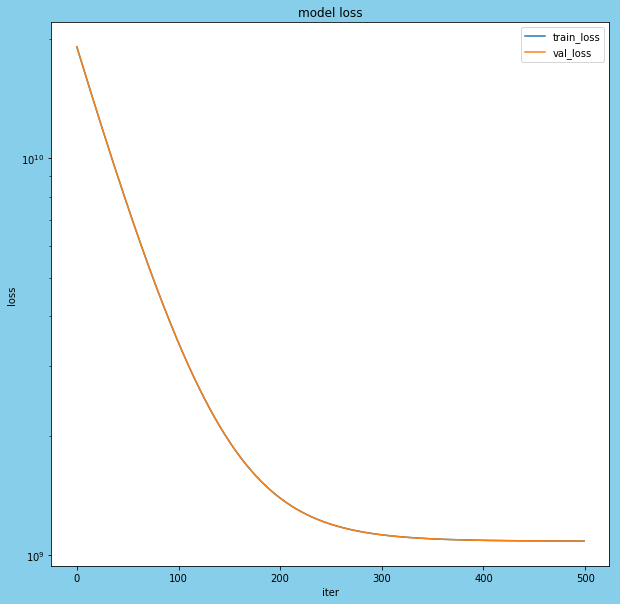

In [24]:
df_loss = pd.DataFrame(slr.use_loss)
# df_loss = df_loss - 1080000000
val_loss = pd.DataFrame(slr.val_loss)
# val_loss = val_loss - 1080000000

# define Initial setting 
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
ax.set_yscale('log') 
plt.grid()


# plot a cross section of mt.Fuji
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")

p1, = plt.plot(df_loss, label='o')
p2, = plt.plot(val_loss)
plt.legend([p1, p2],["train_loss", "val_loss"], loc=1) # 凡例の位置, 名前の指定

plt.grid()
plt.show()

### 【問題3】（アドバンス課題）バイアス項の除去
バイアス項 θ0 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

バイアス項を除くと、特徴量がすべて平均以下の場合、目的変数がマイナスになってしまうため、適切なモデルがつくれず、誤差が小さくならない。

In [11]:
slr_bf = ScratchLinearRegression(num_iter=500, lr=0.01, bias=False, verbose=True)
slr_bf.fit(X_train, y_train)

COUNT:1, MSE:19402265784.70559
COUNT:2, MSE:19359156008.069874
COUNT:3, MSE:19317036803.25393
COUNT:4, MSE:19275885371.55761
COUNT:5, MSE:19235679439.63707
COUNT:6, MSE:19196397247.388306
COUNT:7, MSE:19158017536.110306
COUNT:8, MSE:19120519536.94146
COUNT:9, MSE:19083882959.562664
COUNT:10, MSE:19048087981.16131
COUNT:11, MSE:19013115235.649803
COUNT:12, MSE:18978945803.132957
COUNT:13, MSE:18945561199.6184
COUNT:14, MSE:18912943366.9645
COUNT:15, MSE:18881074663.060116
COUNT:16, MSE:18849937852.231094
COUNT:17, MSE:18819516095.868057
COUNT:18, MSE:18789792943.2705
COUNT:19, MSE:18760752322.70209
COUNT:20, MSE:18732378532.652447
COUNT:21, MSE:18704656233.30048
COUNT:22, MSE:18677570438.174747
COUNT:23, MSE:18651106506.006214
COUNT:24, MSE:18625250132.769
COUNT:25, MSE:18599987343.90479
COUNT:26, MSE:18575304486.726604
COUNT:27, MSE:18551188222.997875
COUNT:28, MSE:18527625521.682747
COUNT:29, MSE:18504603651.8636
COUNT:30, MSE:18482110175.822002
COUNT:31, MSE:18460132942.279293
COUNT:

In [12]:
slr_bf.predict(X_test)

array([[-4.88844886e+04],
       [ 1.31470619e+05],
       [-9.24025316e+04],
       [-1.05133554e+04],
       [ 5.16109169e+04],
       [-8.01296596e+04],
       [ 7.91998477e+03],
       [ 4.16387420e+03],
       [-8.23383769e+04],
       [-2.71601577e+04],
       [-4.90794629e+04],
       [-6.16041871e+04],
       [-9.61674558e+04],
       [ 4.03054349e+04],
       [ 5.04623881e+04],
       [-6.55697734e+04],
       [ 5.77006718e+04],
       [-4.59916962e+04],
       [-1.01637495e+05],
       [ 3.39354911e+04],
       [ 1.36001657e+04],
       [ 4.98944264e+04],
       [ 3.58621234e+04],
       [-6.90267356e+04],
       [ 2.50046978e+04],
       [-3.43602138e+03],
       [ 2.52829908e+04],
       [-8.13185669e+04],
       [ 3.90628777e+04],
       [ 2.53069719e+04],
       [-9.23230047e+04],
       [ 8.72495415e+04],
       [ 1.22090539e+05],
       [-6.75222827e+04],
       [ 5.20110112e+04],
       [-4.02818464e+04],
       [ 1.53665143e+04],
       [ 7.61542012e+04],
       [ 1.2

### 問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

多次元化を行うと、訓練データの誤差は小さくなるが、テストデータの誤差は大きくなる。

In [13]:
# 特徴量の二乗に関する検討
import numpy as np

class ScratchLinearRegressionSquared():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        X = X**2 # squared
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        if type(X_val)==np.ndarray:
            self._gradient_descent(X_val, y_val)
            self.val_loss = self.loss
        
        # シータの初期化
        self._init_theta()
        
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)

#             # X_val入力ある場合MSEのリザルトを出す
#             if type(X_val) == np.ndarray:
#                 val_pred = self._linear_hypothesis(X_val)
#                 self.val_loss[i] = self._compute_cost(val_pred, y_val)
                
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        X = X**2 # squared
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J
        

In [14]:
slrs = ScratchLinearRegressionSquared()
slrs.fit(X_train, y_train, X_test, y_test)
hx_squared = slrs.predict(X_test)

COUNT:1, MSE:19307119774.22614
COUNT:2, MSE:18931937163.603867
COUNT:3, MSE:18564549907.32982
COUNT:4, MSE:18204794303.002804
COUNT:5, MSE:17852510128.054123
COUNT:6, MSE:17507540564.759853
COUNT:7, MSE:17169732126.893375
COUNT:8, MSE:16838934587.981766
COUNT:9, MSE:16515000911.130348
COUNT:10, MSE:16197787180.380655
COUNT:11, MSE:15887152533.567703
COUNT:12, MSE:15582959096.643309
COUNT:13, MSE:15285071919.432964
COUNT:14, MSE:14993358912.794415
COUNT:15, MSE:14707690787.146961
COUNT:16, MSE:14427940992.341005
COUNT:17, MSE:14153985658.83824
COUNT:18, MSE:13885703540.173414
COUNT:19, MSE:13622975956.669312
COUNT:20, MSE:13365686740.37726
COUNT:21, MSE:13113722181.21598
COUNT:22, MSE:12866970974.282354
COUNT:23, MSE:12625324168.308199
COUNT:24, MSE:12388675115.237692
COUNT:25, MSE:12156919420.900734
COUNT:26, MSE:11929954896.758064
COUNT:27, MSE:11707681512.694403
COUNT:28, MSE:11490001350.836622
COUNT:29, MSE:11276818560.374222
COUNT:30, MSE:11068039313.360106
COUNT:31, MSE:1086357176

COUNT:106, MSE:3390412108.6754103
COUNT:107, MSE:3348005125.311614
COUNT:108, MSE:3306450144.5840716
COUNT:109, MSE:3265730030.957988
COUNT:110, MSE:3225827993.921911
COUNT:111, MSE:3186727581.032101
COUNT:112, MSE:3148412671.097295
COUNT:113, MSE:3110867467.501058
COUNT:114, MSE:3074076491.6589284
COUNT:115, MSE:3038024576.607625
COUNT:116, MSE:3002696860.7236614
COUNT:117, MSE:2968078781.5687385
COUNT:118, MSE:2934156069.859362
COUNT:119, MSE:2900914743.5581665
COUNT:120, MSE:2868341102.084493
COUNT:121, MSE:2836421720.6418066
COUNT:122, MSE:2805143444.659586
COUNT:123, MSE:2774493384.34739
COUNT:124, MSE:2744458909.358811
COUNT:125, MSE:2715027643.5631113
COUNT:126, MSE:2686187459.9223595
COUNT:127, MSE:2657926475.471937
COUNT:128, MSE:2630233046.4023266
COUNT:129, MSE:2603095763.240129
COUNT:130, MSE:2576503446.1263185
COUNT:131, MSE:2550445140.189751
COUNT:132, MSE:2524910111.014027
COUNT:133, MSE:2499887840.1957912
COUNT:134, MSE:2475368020.9926553
COUNT:135, MSE:2451340554.05890

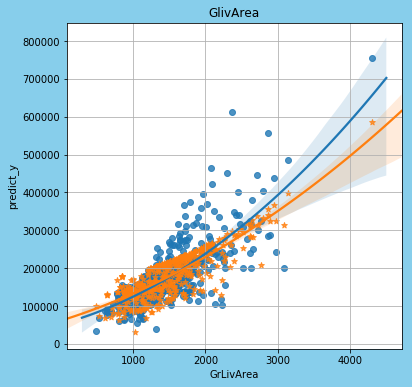

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

predict_y = pd.DataFrame(hx_squared)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

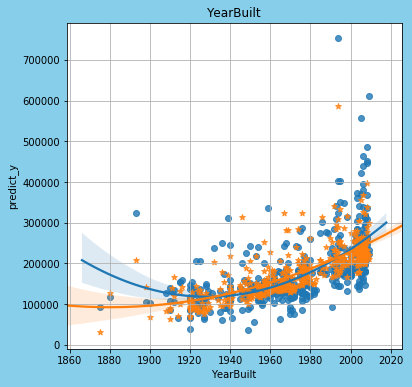

In [16]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

In [17]:
# 特徴量の三乗に関する検討
import numpy as np

class ScratchLinearRegressionCubed():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        X = X**3 # cubed
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        if type(X_val)==np.ndarray:
            self._gradient_descent(X_val, y_val)
            self.val_loss = self.loss
        
        # シータの初期化
        self._init_theta()
        
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)

#             # X_val入力ある場合MSEのリザルトを出す
#             if type(X_val) == np.ndarray:
#                 val_pred = self._linear_hypothesis(X_val)
#                 self.val_loss[i] = self._compute_cost(val_pred, y_val)
                
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        X = X**3 # cubed
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J
        

In [18]:
slrc = ScratchLinearRegressionCubed()
slrc.fit(X_train, y_train, X_test, y_test)
hx_cubed = slrc.predict(X_test)

COUNT:1, MSE:19307185034.2292
COUNT:2, MSE:18932001003.75166
COUNT:3, MSE:18564612359.74785
COUNT:4, MSE:18204855399.06711
COUNT:5, MSE:17852569898.409153
COUNT:6, MSE:17507599039.335938
COUNT:7, MSE:17169789334.923782
COUNT:8, MSE:16838990558.0193
COUNT:9, MSE:16515055671.063591
COUNT:10, MSE:16197840757.449793
COUNT:11, MSE:15887204954.379963
COUNT:12, MSE:15583010387.18803
COUNT:13, MSE:15285122105.096302
COUNT:14, MSE:14993408018.373697
COUNT:15, MSE:14707738836.864672
COUNT:16, MSE:14427988009.858465
COUNT:17, MSE:14154031667.268915
COUNT:18, MSE:13885748562.095942
COUNT:19, MSE:13623020014.140182
COUNT:20, MSE:13365729854.943205
COUNT:21, MSE:13113764373.926052
COUNT:22, MSE:12867012265.69973
COUNT:23, MSE:12625364578.521685
COUNT:24, MSE:12388714663.872953
COUNT:25, MSE:12156958127.131262
COUNT:26, MSE:11929992779.315853
COUNT:27, MSE:11707718589.880404
COUNT:28, MSE:11490037640.530924
COUNT:29, MSE:11276854080.045986
COUNT:30, MSE:11068074080.077276
COUNT:31, MSE:10863605791.90

COUNT:58, MSE:7171932275.774494
COUNT:59, MSE:7061806089.242768
COUNT:60, MSE:6953884062.847805
COUNT:61, MSE:6848122062.239015
COUNT:62, MSE:6744476837.169167
COUNT:63, MSE:6642906003.775591
COUNT:64, MSE:6543368027.216666
COUNT:65, MSE:6445822204.656487
COUNT:66, MSE:6350228648.590676
COUNT:67, MSE:6256548270.50656
COUNT:68, MSE:6164742764.870956
COUNT:69, MSE:6074774593.439017
COUNT:70, MSE:5986606969.877681
COUNT:71, MSE:5900203844.697426
COUNT:72, MSE:5815529890.486154
COUNT:73, MSE:5732550487.439101
COUNT:74, MSE:5651231709.178896
COUNT:75, MSE:5571540308.859893
COUNT:76, MSE:5493443705.5511055
COUNT:77, MSE:5416909970.892156
COUNT:78, MSE:5341907816.016737
COUNT:79, MSE:5268406578.738246
COUNT:80, MSE:5196376210.992323
COUNT:81, MSE:5125787266.531138
COUNT:82, MSE:5056610888.864384
COUNT:83, MSE:4988818799.442008
COUNT:84, MSE:4922383286.073871
COUNT:85, MSE:4857277191.581541
COUNT:86, MSE:4793473902.677577
COUNT:87, MSE:4730947339.067775
COUNT:88, MSE:4669671942.771838
COUNT:89

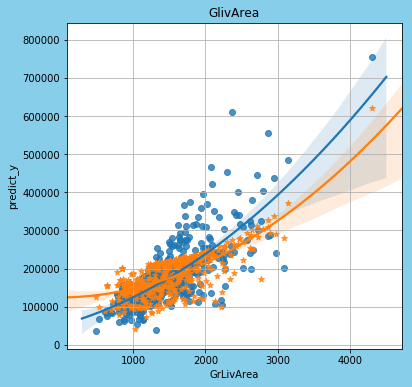

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

predict_y = pd.DataFrame(hx_cubed)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

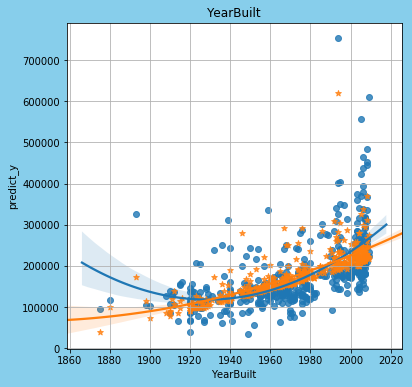

In [20]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

### 【問題5】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。



### 【問題6】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

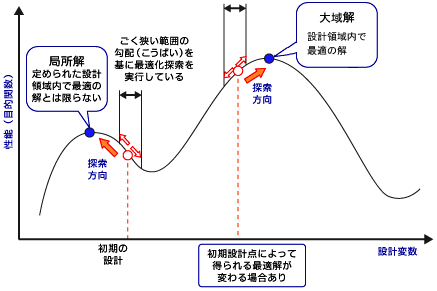

In [21]:
# plan
import os
import os.path
from IPython.display import display
from PIL import Image

path1 = "kyokusho.gif"
display(Image.open(path1))

### 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か
注意点
感想ではなく、他人を納得させられるような内容にしてください。

<br>・標準化が必要かどうかを確認できる。
<br>・パラメータ数値の更新がどのように行われているかの可視化できる。
<br>・クラスの構造への理解ができる(インスタンス変数、イニシャル変数など)